**Simple Regresi Linier** ini digunakan untuk menyelesaikan masalah berupa prediksi penjualan. Akan menggunakan dataset sales yang merupakan dataset contoh.


Mempersiapkan library yang akan digunakan

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from google.colab import files
upload = files.upload()

Saving sales.csv to sales.csv


In [0]:
sales = pd.read_csv('sales.csv')

In [5]:
print(sales)

    BiayaPromo  NilaiPenjualan
0         1500           90500
1         1800           89500
2         2100          105000
3         2400          102000
4         2700           90500
5         3000          104500
6         3300          109500
7         3600          150000
8         3900          152000
9         4200          173000
10        4500          153000
11        4800          174500
12        5100          150000
13        5400          198000
14        5700          187000
15        6000          194500
16        6300          170500
17        6600          204500
18        6900          224500


Jika kodenya diekseskusi akan menghasilkan 3 variabel baru, yaitu **dataset** yang berisi keseluruhan data, x sebagai **independent variable**, dan y sebagai **dependent variable**

In [0]:
x = sales.iloc[:,:-1].values
y = sales.iloc[:,1].values

Melihat variable dalam dataset

In [7]:
sales.keys()

Index(['BiayaPromo', 'NilaiPenjualan'], dtype='object')

melihat bentuk dari dataset. Kolom pertama menyatakan jumlah baris dan kolom kedua menyatakan jumlah variablenya

In [8]:
sales.shape

(19, 2)

In [9]:
mydata = pd.DataFrame(sales)
mydata.head()

,BiayaPromo,NilaiPenjualan
0,1500,90500
1,1800,89500
2,2100,105000
3,2400,102000
4,2700,90500


Kodingan diatas menggunakan library Pandas, untuk melihat sebagian dari isi dataset yang ada

In [10]:
mydata.tail()

,BiayaPromo,NilaiPenjualan
14,5700,187000
15,6000,194500
16,6300,170500
17,6600,204500
18,6900,224500


Head untuk melihat data yang paling atas, diambil secara urut 5 data, dimulai dari 0. Tail untuk melihat data paling akhir

In [0]:
#Split data set menjadi Training Set dan Test Set
from sklearn. model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 

Kode diatas untuk membagi dataset kita menjadi **training set **sebesar 80% dan test set sebesar 20%. **XYxy** dideklarasikan untuk nantinya diproses dalam test dan training set

Melakukan FITTING SLP

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Memprediksu hasil test set
y_pred = regressor.predict(X_test)

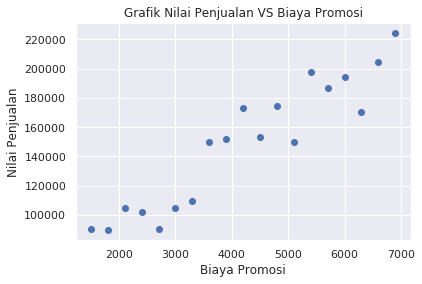

In [16]:
#Visualize Data
plt.scatter(mydata.BiayaPromo,mydata.NilaiPenjualan)
plt.xlabel("Biaya Promosi")
plt.ylabel("Nilai Penjualan")
plt.title("Grafik Nilai Penjualan VS Biaya Promosi")
plt.show()

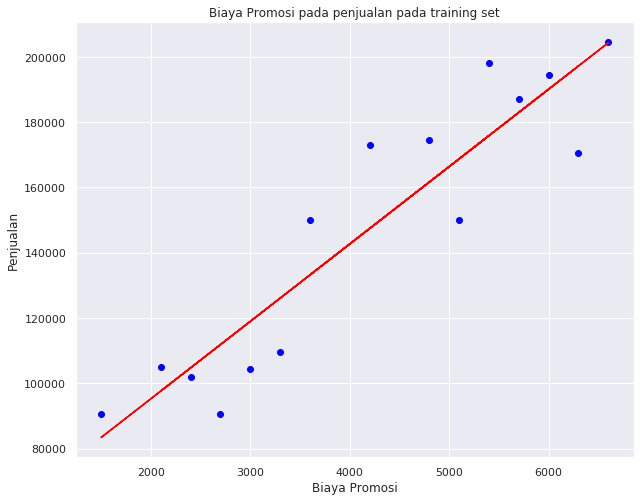

In [17]:
#Visualisasi Hasil Prediksi Pada Training Set
#Ukuran Plot
plt.figure(figsize=(10,8))
#Biru adalah data observasi
plt.scatter(X_train, y_train, color ='blue')
#Garis Merah adalah hasil prediction dari ML
plt.plot(X_train, regressor.predict(X_train),color='red')
#memberi judul dan label
plt.title("Biaya Promosi pada penjualan pada training set")
plt.xlabel('Biaya Promosi')
plt.ylabel('Penjualan')
plt.show()

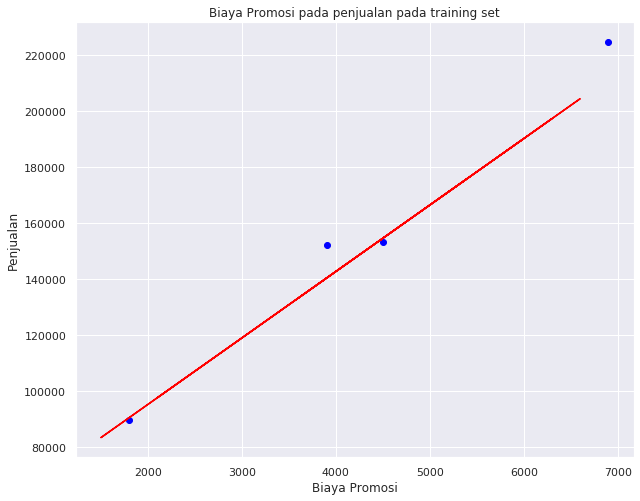

In [27]:
#Visualisasi data pada test set
#Ukuran Plot
plt.figure(figsize=(10,8))
#Biru adalah data observasi
plt.scatter(X_test, y_test, color ='blue')
#Garis Merah adalah hasil prediction dari ML
plt.plot(X_train, regressor.predict(X_train),color='red')
#memberi judul dan label
plt.title("Biaya Promosi pada penjualan pada training set")
plt.xlabel('Biaya Promosi')
plt.ylabel('Penjualan')
plt.show()

In [49]:
import ipywidgets as widgets
from IPython.display import display
textbox = widgets.FloatText(value=7.5, description='Biaya:',disabled=False)
button = widgets.Button(description="Prediksi")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    y_hasil = regressor.predict([[textbox.value]])
    print("Biaya: %d" % textbox.value)
    print("Penjualan: %d" % y_hasil[0])

button.on_click(on_button_clicked)
display(textbox, output)
display(button, output)

FloatText(value=7.5, description='Biaya:')

Output()

Button(description='Prediksi', style=ButtonStyle())

Output()